In [2]:
import pandas as pd
import numpy as np

from rice_ml.supervised_learning import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/lesions_processed.csv")
df.head()

feature_cols = ["x_norm", "y_norm", "slice_norm", "r_xy", "experiment"]
target_col = "tampered"

X = df[feature_cols].values
y = df[target_col].values.astype(int)

X.shape, y.shape


((169, 5), (169,))

In [3]:
#train and test split
rng = np.random.default_rng(42)

n = len(y)
indices = np.arange(n)
rng.shuffle(indices)

split = int(0.75 * n)
train_idx = indices[:split]
test_idx = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


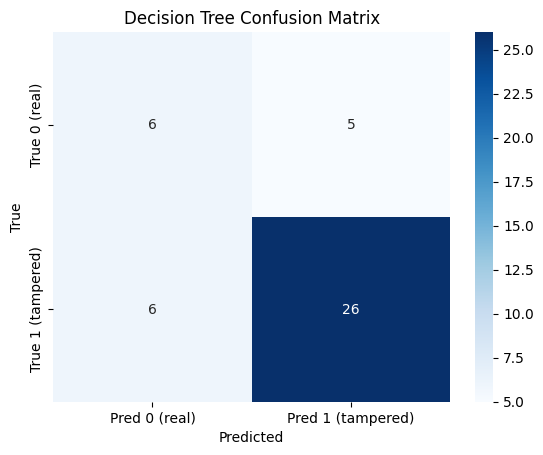

In [4]:
#fit
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

#accuracy
accuracy = np.mean(y_pred == y_test)
accuracy

#confusion matrix
def confusion_matrix_np(y_true, y_pred):
    cm = np.zeros((2, 2), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1
    return cm

cm = confusion_matrix_np(y_test, y_pred)
cm
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred 0 (real)", "Pred 1 (tampered)"],
    yticklabels=["True 0 (real)", "True 1 (tampered)"],
)

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [5]:
#precision
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

precision = TP / (TP + FP) if (TP + FP) > 0 else 0

#recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

#f1
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

precision, recall, f1


(np.float64(0.8387096774193549),
 np.float64(0.8125),
 np.float64(0.8253968253968254))

The decision tree achieves high precision and recall for detecting tampered scans, indicating that it is effective at identifying manipulated lesions while maintaining a reasonable false-positive rate. The model favors recall slightly less than logistic regression, suggesting a tradeoff between interpretability and sensitivity.